In [5]:
import pandas as pd
import numpy as np
df=pd.read_csv("train1.csv")


In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = df.dropna(subset=['Age', 'Fare'])

X = df[['Age', 'Fare']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_scaled)
df['Cluster'] = kmeans.labels_

print(df[['Age', 'Fare', 'Cluster']].head(20))


     Age     Fare  Cluster
0   22.0   7.2500        0
1   38.0  71.2833        1
2   26.0   7.9250        0
3   35.0  53.1000        1
4   35.0   8.0500        0
6   54.0  51.8625        1
7    2.0  21.0750        0
8   27.0  11.1333        0
9   14.0  30.0708        0
10   4.0  16.7000        0
11  58.0  26.5500        1
12  20.0   8.0500        0
13  39.0  31.2750        1
14  14.0   7.8542        0
15  55.0  16.0000        1
16   2.0  29.1250        0
18  31.0  18.0000        0
20  35.0  26.0000        0
21  34.0  13.0000        0
22  15.0   8.0292        0


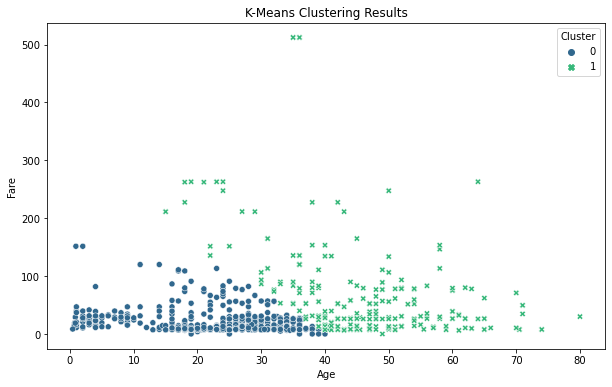

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Cluster', palette='viridis', style='Cluster')

plt.title('K-Means Clustering Results')
plt.xlabel('Age')
plt.ylabel('Fare')

plt.legend(title='Cluster')
plt.show()


In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from deap import algorithms, base, creator, tools

data = pd.read_csv('train1.csv')

# data preprocessing
data = data[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
data['Sex'] = data['Sex'].map({'female': 1, 'male': 0})
data = data.dropna()

X = data.drop('Survived', axis=1).values
y = data['Survived'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

# define individual
creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register('attr_bool', np.random.randint, 0, 2)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_bool, n=X.shape[1])
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

def evalSurvival(individual):
    return np.mean(individual * X),
toolbox.register('evaluate', evalSurvival)
toolbox.register('mate', tools.cxTwoPoint)
toolbox.register('mutate', tools.mutFlipBit, indpb=0.05)
toolbox.register('select', tools.selTournament, tournsize=3)


# define function
def main():
    pop = toolbox.population(n=100)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register('avg', np.mean)
    stats.register('max', np.max)
    
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, stats=stats, halloffame=hof, verbose=True)
    
    return pop, log, hof

if __name__ == '__main__':
    pop, log, hof = main()
    print('Best individual: %s' % hof[0])
    print('Best individual fitness: %s' % hof[0].fitness.values[0])

/Users/quyongyuan/opt/anaconda3/lib/python3.8/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/quyongyuan/opt/anaconda3/lib/python3.8/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg        	max        
0  	100   	1.72116e-17	6.50351e-17
1  	53    	4.342e-17  	6.50351e-17
2  	51    	5.60064e-17	6.50351e-17
3  	57    	6.26464e-17	6.50351e-17
4  	65    	6.37923e-17	6.50351e-17
5  	48    	6.36166e-17	6.50351e-17
6  	55    	6.32722e-17	6.50351e-17
7  	56    	6.33546e-17	6.50351e-17
8  	64    	6.47828e-17	6.50351e-17
9  	57    	6.43824e-17	6.50351e-17
10 	57    	6.37298e-17	6.50351e-17
11 	69    	6.44656e-17	6.50351e-17
12 	62    	6.24345e-17	6.50351e-17
13 	55    	6.4314e-17 	6.50351e-17
14 	57    	6.47455e-17	6.50351e-17
15 	65    	6.42514e-17	6.50351e-17
16 	58    	6.36664e-17	6.50351e-17
17 	65    	6.27124e-17	6.50351e-17
18 	58    	6.46895e-17	6.50351e-17
19 	60    	6.45216e-17	6.50351e-17
20 	61    	6.36551e-17	6.50351e-17
21 	62    	6.42145e-17	6.50351e-17
22 	61    	6.41014e-17	6.50351e-17
23 	50    	6.38965e-17	6.50351e-17
24 	56    	6.38231e-17	6.50351e-17
25 	57    	6.43167e-17	6.50351e-17
26 	61    	6.49045e-17	6.50351e-17
27 	62    	6.38965e-

In [18]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# feature selection
features = ['Sex', 'Age']
X = data[features]
y = data['Survived']

# dealing missing value
imputer = SimpleImputer(strategy='mean')
X['Age'] = imputer.fit_transform(X[['Age']])

X['Sex'] = X['Sex'].map({'female': 1, 'male': 0})

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predication
y_pred = lr.predict_proba(X_test)[:, 1]

# Accuracy ratio
accuracy = lr.score(X_test, y_test)
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.782


<ipython-input-18-055fe2ab3089>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = imputer.fit_transform(X[['Age']])
<ipython-input-18-055fe2ab3089>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'female': 1, 'male': 0})


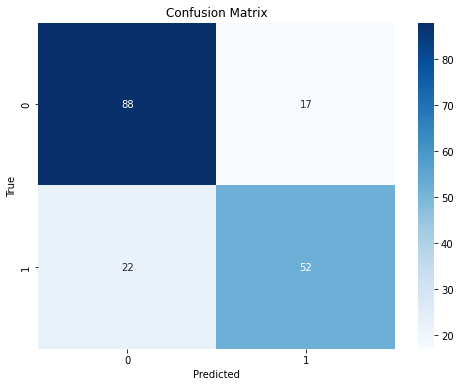

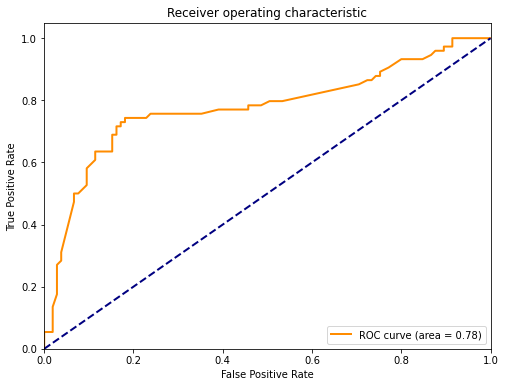

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

y_pred_class = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred_class)

# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [21]:
import numpy as np
import pandas as pd

# Example
passenger = pd.DataFrame({
    'Sex': ['male'],
    'Age': [30]
})

passenger['Sex'] = passenger['Sex'].map({'female': 1, 'male': 0})

passenger = scaler.transform(passenger)
survival_probability = lr.predict_proba(passenger)[:, 1]

# Set Threshold
threshold = 0.5
if survival_probability >= threshold:
    print(f'The passenger is predicted to survive with a probability of {survival_probability[0]:.2f}')
else:
    print(f'The passenger is predicted to die with a probability of {1 - survival_probability[0]:.2f}')

The passenger is predicted to die with a probability of 0.81
